In [ ]:
import os

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models

from tensorflow.keras.datasets import cifar10

from tensorflow.keras.utils import to_categorical

#  Load and prepare the CIFAR-10 dataset

In [ ]:
print("Loading CIFAR-10 dataset...")

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)  # (50000, 32, 32, 3) (50000, 1)
print(x_test.shape, y_test.shape)    # (10000, 32, 32, 3) (10000, 1)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


# Normalize pixel values to range [0, 1]

In [ ]:
x_train = x_train.astype('float32') / 255.0

x_test  = x_test.astype('float32')  / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)

# Example: label 3 → [0,0,0,1,0,0,0,0,0,0]

In [ ]:
y_train = to_categorical(y_train, 10)

y_test  = to_categorical(y_test,  10)

print(f"Training data shape: {x_train.shape}")   # (50000, 32, 32, 3)

print(f"Test data shape:     {x_test.shape}")    # (10000, 32, 32, 3)

Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# Define class names (for better visualization)

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',

               'dog', 'frog', 'horse', 'ship', 'truck']

# Build a simple CNN model

In [ ]:
model = models.Sequential([

    # First Convolutional Block

    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),

    layers.BatchNormalization(),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),

    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.25),

    # Second Convolutional Block

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    layers.BatchNormalization(),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),

    layers.BatchNormalization(),

    layers.MaxPooling2D((2, 2)),

    layers.Dropout(0.25),

    # Flatten and Dense layers

    layers.Flatten(),

    layers.Dense(512, activation='relu'),

    layers.BatchNormalization(),

    layers.Dropout(0.5),

      # Output layer – 10 classes

    layers.Dense(10, activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile the model

In [ ]:
model.compile(optimizer='adam',

              loss='categorical_crossentropy',

              metrics=['accuracy'])

model.summary()   # Print model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,171,178 (8.28 MB)

 Trainable params: 2,169,770 (8.28 MB)

 Non-trainable params: 1,408 (5.50 KB)

#  Train the model

In [ ]:
print("\nTraining the model...")

history = model.fit( x_train, y_train,

                    epochs=20,               # increase to 30–50 for better results

                    batch_size=256,

                    validation_data=(x_test, y_test),

                    verbose=1)


Training the model...
Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step - accuracy: 0.9355 - loss: 0.1826 - val_accuracy: 0.8321 - val_loss: 0.5720
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9478 - loss: 0.1522 - val_accuracy: 0.8281 - val_loss: 0.5826
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9481 - loss: 0.1456 - val_accuracy: 0.8303 - val_loss: 0.6012
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9516 - loss: 0.1389 - val_accuracy: 0.8299 - val_loss: 0.6160
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9526 - loss: 0.1319 - val_accuracy: 0.8241 - val_loss: 0.6299
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9541 - loss: 0.1266 - val_accuracy: 0.8246 - val_loss: 0.6311
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9567 - loss: 0.1226 - val_accuracy: 0.8088 - val_loss: 0.7197
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9563 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

print(f"\nTest accuracy: {test_acc:.4f}  ({test_acc*100:.2f}%)")


Test accuracy: 0.8343  (83.43%)


# Step 8: Visualize training history

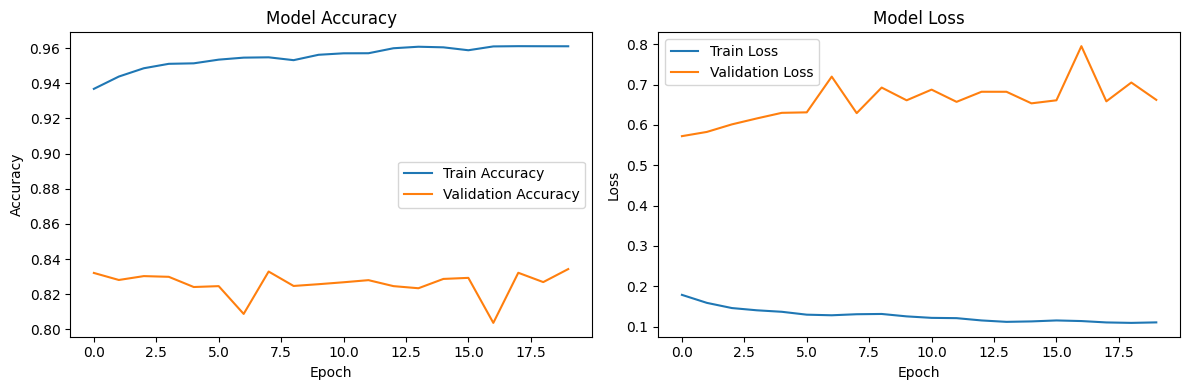

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)

plt.plot(history.history['accuracy'], label='Train Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.legend()

plt.subplot(1, 2, 2)

plt.plot(history.history['loss'], label='Train Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.legend()

plt.tight_layout()

plt.show()

# Step 9: Make predictions on a few test images (visual check)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


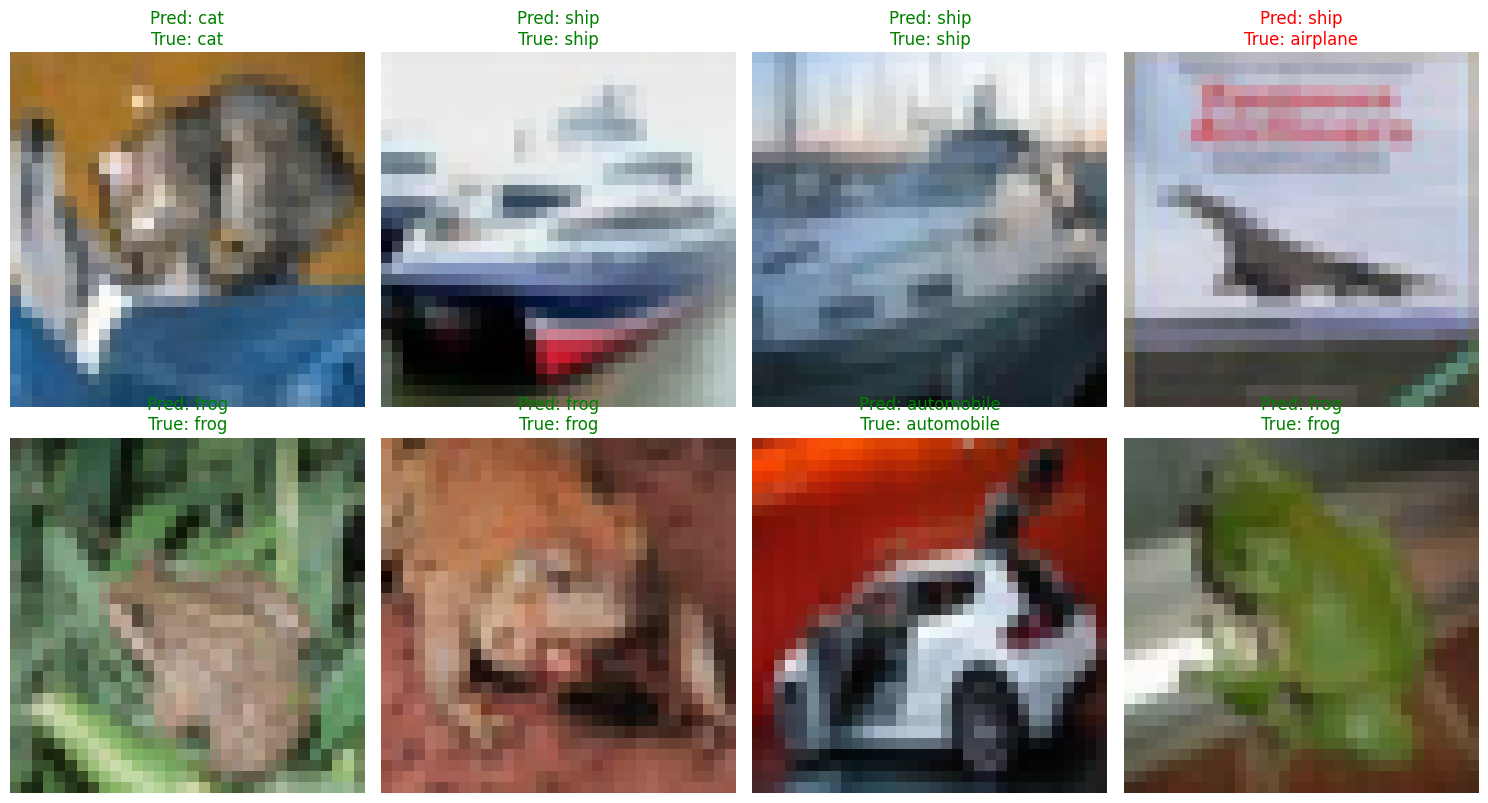

In [ ]:
num_images = 8

predictions = model.predict(x_test[:num_images])

predicted_classes = np.argmax(predictions, axis=1)

true_classes = np.argmax(y_test[:num_images], axis=1)



plt.figure(figsize=(15, 8))

for i in range(num_images):

    plt.subplot(2, 4, i+1)

    plt.imshow(x_test[i])

    plt.title(f"Pred: {class_names[predicted_classes[i]]}\nTrue: {class_names[true_classes[i]]}",

              color=("green" if predicted_classes[i] == true_classes[i] else "red"))

    plt.axis('off')

plt.tight_layout()

plt.show()

# Exploring Transfer Learning with Pre-trained Models

Practical 2: Exploring Transfer Learning with Pre-trained Models

# ------------------------------------------------------------------------------

# Practical 2: Transfer Learning with Pre-trained Model (VGG16)

# Course: Computer Vision

# Objective: Use a pre-trained VGG16 model + fine-tuning on a small custom dataset

# Dataset: Cats vs Dogs (binary classification)

# Tools: TensorFlow 2.x + Keras + pre-trained VGG16

# ------------------------------------------------------------------------------

In [ ]:
import tensorflow as tf

from tensorflow.keras import layers, models

from tensorflow.keras.applications import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
import os
import zipfile

# 1. Download the file
print("Downloading...")
_URL = 'https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL)

# 2. Extract manually to a specific local directory
local_extract_path = '/tmp/cats_and_dogs_project'
with zipfile.ZipFile(path_to_zip, 'r') as zip_ref:
    zip_ref.extractall(local_extract_path)

# 3. Define the new PATH (The zip usually creates a subfolder with its name)
PATH = os.path.join(local_extract_path, 'cats_and_dogs_filtered')

# 4. Set up the specific directories
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 5. Verify
if os.path.exists(train_cats_dir):
    print("Success! Folders found.")
    print(f"Total training cat images: {len(os.listdir(train_cats_dir))}")
    print(f"Total training dog images: {len(os.listdir(train_dogs_dir))}")
else:
    print("Still not found. Let's see what is actually inside the folder:")
    print(os.listdir(local_extract_path))

Downloading...
Success! Folders found.
Total training cat images: 1000
Total training dog images: 1000


In [ ]:
IMG_SIZE = (160, 160)          # VGG16 usually expects 224×224, but 160 is faster for demo

BATCH_SIZE = 32

train_datagen = ImageDataGenerator(

    rescale=1./255,

    rotation_range=20,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    fill_mode='nearest'

)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(

    train_dir,

    target_size=IMG_SIZE,

    batch_size=BATCH_SIZE,

    class_mode='binary'

)

validation_generator = validation_datagen.flow_from_directory(

    validation_dir,

    target_size=IMG_SIZE,

    batch_size=BATCH_SIZE,

    class_mode='binary'

)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
base_model = VGG16(weights='imagenet',

                   include_top=False,           # remove final dense layers

                   input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

# Freeze the base model (very important in transfer learning)

base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Sequential([

    base_model,

    layers.GlobalAveragePooling2D(),          # better than Flatten for conv base

    layers.Dense(512, activation='relu'),

    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')     # binary classification → sigmoid

])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 5, 5, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,977,857 (57.14 MB)

 Trainable params: 263,169 (1.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),

              loss='binary_crossentropy',

              metrics=['accuracy'])

# Step 7: Train the top layers first (feature extractor frozen)

print("\nPhase 1: Training top layers only...")

history_phase1 = model.fit(

    train_generator,

    epochs=10,

    validation_data=validation_generator,

    verbose=1

)


Phase 1: Training top layers only...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 434ms/step - accuracy: 0.5442 - loss: 0.7100 - val_accuracy: 0.7740 - val_loss: 0.5999
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.6257 - loss: 0.6396 - val_accuracy: 0.8010 - val_loss: 0.5344
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 297ms/step - accuracy: 0.7163 - loss: 0.5747 - val_accuracy: 0.8240 - val_loss: 0.4897
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 309ms/step - accuracy: 0.7460 - loss: 0.5407 - val_accuracy: 0.8300 - val_loss: 0.4560
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.7737 - loss: 0.5089 - val_accuracy: 0.8320 - val_loss: 0.4314
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 307ms/step - accuracy: 0.7816 - loss: 0.4790 - val_accuracy: 0.8340 - val_loss: 0.4093
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.8060 - loss: 0.4620 - val_accuracy: 0.8360 - val_loss: 0.3926
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.8080 - loss: 0.4299 - val_accu

In [ ]:
# Step 8: Unfreeze some layers and fine-tune (optional Phase 2)

print("\nUnfreezing last few conv blocks for fine-tuning...")

base_model.trainable = True

# Freeze all layers except the last 4 blocks (example)

for layer in base_model.layers[:-16]:

    layer.trainable = False


Unfreezing last few conv blocks for fine-tuning...


In [ ]:
# Re-compile with lower learning rate (very important!)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),

              loss='binary_crossentropy',

              metrics=['accuracy'])

print("Phase 2: Fine-tuning...")

history_phase2 = model.fit(

    train_generator,

    epochs=10,

    validation_data=validation_generator,

    verbose=1

)

Phase 2: Fine-tuning...
Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 607ms/step - accuracy: 0.8568 - loss: 0.3123 - val_accuracy: 0.9390 - val_loss: 0.1411
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.9367 - loss: 0.1650 - val_accuracy: 0.9570 - val_loss: 0.1083
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 388ms/step - accuracy: 0.9546 - loss: 0.1220 - val_accuracy: 0.9280 - val_loss: 0.1912
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.9371 - loss: 0.1568 - val_accuracy: 0.9620 - val_loss: 0.0988
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 357ms/step - accuracy: 0.9653 - loss: 0.0957 - val_accuracy: 0.9700 - val_loss: 0.0829
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.9778 - loss: 0.0679 - val_accuracy: 0.9600 - val_loss: 0.1088
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 353ms/step - accuracy: 0.9716 - loss: 0.0700 - val_accuracy: 0.9660 - val_loss: 0.0979
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.9735 -

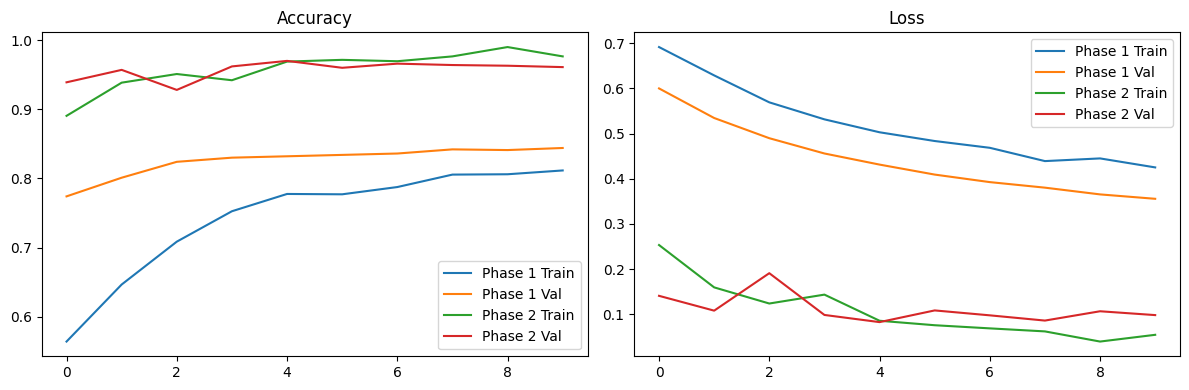

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, titles):

    plt.figure(figsize=(12, 4))

    for i, hist in enumerate(histories):

        plt.subplot(1, 2, 1)

        plt.plot(hist.history['accuracy'], label=f'{titles[i]} Train')

        plt.plot(hist.history['val_accuracy'], label=f'{titles[i]} Val')

        plt.title('Accuracy')

        plt.legend()

        plt.subplot(1, 2, 2)

        plt.plot(hist.history['loss'], label=f'{titles[i]} Train')

        plt.plot(hist.history['val_loss'], label=f'{titles[i]} Val')

        plt.title('Loss')

        plt.legend()

    plt.tight_layout()

    plt.show()

plot_history([history_phase1, history_phase2], ['Phase 1', 'Phase 2'])

In [ ]:
# Step 10: Evaluate final model

loss, acc = model.evaluate(validation_generator, verbose=0)

print(f"\nFinal validation accuracy: {acc:.4f} ({acc*100:.2f}%)")

# Optional: Save model

# model.save("vgg16_cats_dogs_transfer.h5")

print("Practical 2 completed.")


Final validation accuracy: 0.9610 (96.10%)
Practical 2 completed.


Fine Tune

In [ ]:
# Re-compile with lower learning rate (very important!)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),

              loss='binary_crossentropy',

              metrics=['accuracy'])

print("Phase 2: Fine-tuning...")

history_phase2 = model.fit(

    train_generator,

    epochs=51,

    validation_data=validation_generator,

    verbose=1

)

Phase 2: Fine-tuning...
Epoch 1/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 455ms/step - accuracy: 0.9690 - loss: 0.0775 - val_accuracy: 0.9700 - val_loss: 0.0788
Epoch 2/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.9926 - loss: 0.0266 - val_accuracy: 0.9670 - val_loss: 0.0970
Epoch 3/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 362ms/step - accuracy: 0.9859 - loss: 0.0371 - val_accuracy: 0.9670 - val_loss: 0.0798
Epoch 4/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.9904 - loss: 0.0295 - val_accuracy: 0.9700 - val_loss: 0.0966
Epoch 5/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 359ms/step - accuracy: 0.9875 - loss: 0.0356 - val_accuracy: 0.9700 - val_loss: 0.0821
Epoch 6/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 356ms/step - accuracy: 0.9911 - loss: 0.0231 - val_accuracy: 0.9780 - val_loss: 0.0776
Epoch 7/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.9917 - loss: 0.0246 - val_accuracy: 0.9750 - val_loss: 0.0883
Epoch 8/51
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 358ms/step - accuracy: 0.9920 -

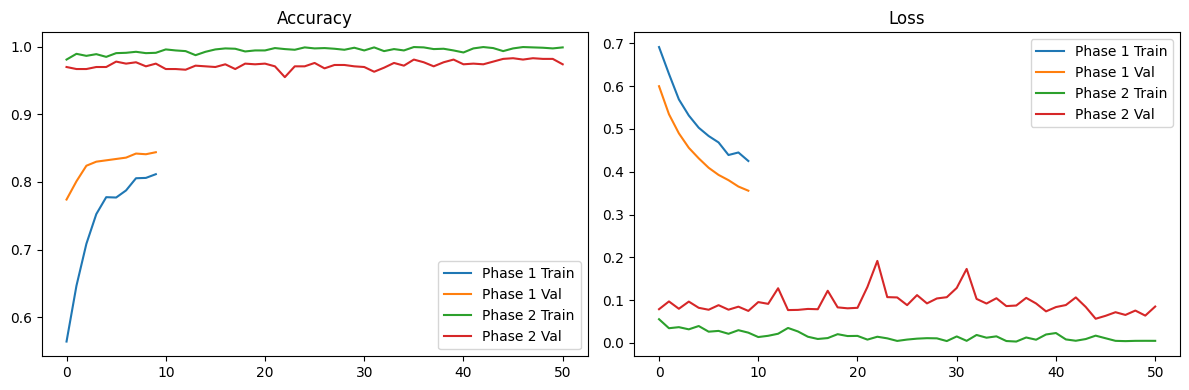

In [ ]:
import matplotlib.pyplot as plt

def plot_history(histories, titles):

    plt.figure(figsize=(12, 4))

    for i, hist in enumerate(histories):

        plt.subplot(1, 2, 1)

        plt.plot(hist.history['accuracy'], label=f'{titles[i]} Train')

        plt.plot(hist.history['val_accuracy'], label=f'{titles[i]} Val')

        plt.title('Accuracy')

        plt.legend()

        plt.subplot(1, 2, 2)

        plt.plot(hist.history['loss'], label=f'{titles[i]} Train')

        plt.plot(hist.history['val_loss'], label=f'{titles[i]} Val')

        plt.title('Loss')

        plt.legend()

    plt.tight_layout()

    plt.show()

plot_history([history_phase1, history_phase2], ['Phase 1', 'Phase 2'])

In [ ]:
# Step 10: Evaluate final model

loss, acc = model.evaluate(validation_generator, verbose=0)

print(f"\nFinal validation accuracy: {acc:.4f} ({acc*100:.2f}%)")

# Optional: Save model

# model.save("vgg16_cats_dogs_transfer.h5")

print("Practical 2 completed.")


Final validation accuracy: 0.9740 (97.40%)
Practical 2 completed.
